In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib
%matplotlib inline

In [26]:
class ColorReduction:
    def __call__(self, img):
        if len(img.shape) == 3:
            return self.apply_3(img)
        if len(img.shape) == 2:
            return self.apply_2(img)
        return None
        
    # problem 84 の reference solution は、ここの処理間違ってそう
    def reduction_onepixel(self, value):
        if 0 <= value < 64:
            return 32
        elif 64 <= value < 128:
            return 96
        elif 128 <= value < 192:
            return 160
        elif 192 <= value < 256:
            return 224
        return -1
    
    def apply_3(self, img):
        H, W, ch = img.shape
        output_img = img.copy()
        for i in range(H):
            for j in range(W):
                for c in range(ch):
                    output_img[i, j, c] = self.reduction_onepixel(img[i, j, c])
        return output_img
    
    def apply_2(self, img):
        H, W = img.shape
        output_img = img.copy()
        for i in range(H):
            for j in range(W):
                output_img[i, j] = self.reduction_onepixel(img[i, j])
        return output_img

In [35]:
class TinyImageRecognition:
    def __init__(self, path):
        self.color_reduction = ColorReduction()
        self.reduced_valuemap = {
            32: 0,
            96: 1,
            160: 2,
            224: 3
        }
        self.path = path

        self.images, self.names = self._get_images()
        self.hists = self._get_hists()
         
    def _get_images(self):
        images, names = [], []
        file_list = sorted(glob.glob(self.path + "/train_*.jpg"))
        for file in file_list:
            images.append(cv2.imread(file))
            names.append(pathlib.Path(file).name)
        return images, names
    
    def _get_hist(self, img):
        assert len(img.shape) == 3, "invalid img dimension: expected: 3, got: {}".format(img.shape)
        H, W, ch = img.shape
        
        hist = np.zeros((12))
        for i in range(H):
            for j in range(W):
                for c in range(ch):
                    cls = 4*c + self.reduced_valuemap[self.color_reduction.reduction_onepixel(img[i, j, c])]
                    hist[cls] += 1
        return hist
    
    def _get_hists(self):
        # create histograms
        hists = np.zeros((len(self.images), 12))
        for i in range(len(self.images)):
            hists[i] = self._get_hist(self.images[i])
        return hists
    
    def problem_84(self):
        plt.figure(figsize=(20, 10))
        for i in range(len(self.images)):
            plt.subplot(2, 5, i+1)
            plt.title(self.names[i])
            plt.bar(np.arange(0, 12) + 1, self.hists[i])
            print(self.hists[i])
        plt.show()

[  187. 12390.  2867.   940.   583. 11705.  3231.   865.   477. 10249.
  4667.   991.]
[3901. 7207. 4435.  841. 2008. 8299. 4665. 1412. 1085. 9010. 4977. 1312.]
[1620. 6778. 5718. 2268. 1753. 8739. 5065.  827. 1555. 5463. 7195. 2171.]
[  858. 10647.  4855.    24.  1548.  7890.  6921.    25.  1648.  7723.
  6970.    43.]
[ 220. 4448. 8672. 3044.  686. 5878. 7878. 1942.  493. 4065. 6682. 5144.]
[3092. 6200. 2568. 4524. 1746. 7194. 3153. 4291.  215. 8709. 1538. 5922.]
[5661. 7818. 1521. 1384. 4702. 6868. 3347. 1467. 4793. 8001. 2029. 1561.]
[4973. 7595. 3163.  653. 4365. 6409. 3034. 2576. 4396. 7216. 3343. 1429.]
[7988. 6165. 1919.  312. 7497. 4035. 4216.  636. 7443. 5116. 3201.  624.]
[5750. 6680. 3773.  181. 5102. 4299. 6273.  710. 5291. 5085. 5464.  544.]


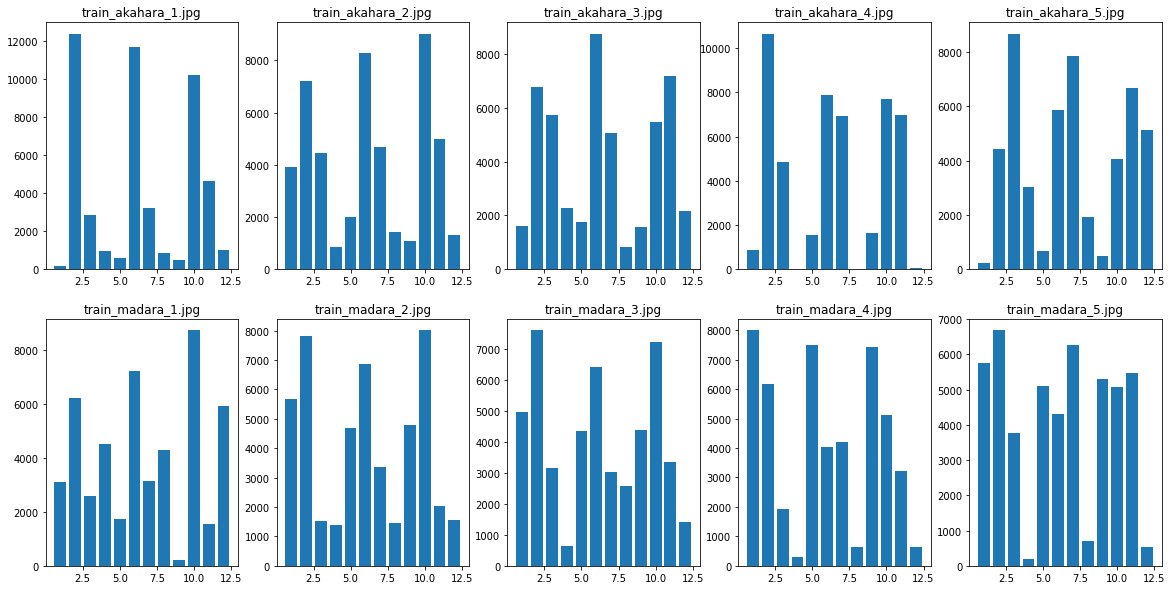

In [36]:
recog = TinyImageRecognition("../dataset")
recog.problem_84()